In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set(color_codes=True)

### First of all a quick look at the data

In [ ]:
spk_df = spark.read.table('Train')
df = spk_df.toPandas()
df.pop('id')
display(spk_df)

id,Loan Amount,Term,State,Annual Income,Income Verification Status,Average Account Balance,Due Amount,Home Ownership,Loan Purpose,Due Settlement,Installment Amount,Payment Plan,Approve Loan
1,5000,36,CA,60000,Verified,10000,0,RENT,Education,N,150,N,1
2,10000,24,NY,80000,Partially Verified,15000,50,OWN,Debt Consolidation,Y,300,Y,0
3,15000,48,TX,70000,Not Verified,12000,100,MORTGAGE,Home Improvement,N,200,N,1
4,8000,12,FL,50000,Verified,8000,0,RENT,Other,N,250,Y,0
5,12000,36,CA,90000,Partially Verified,20000,75,OWN,Debt Consolidation,Y,400,N,1
6,10000,24,NY,75000,Not Verified,13000,30,MORTGAGE,Medical Expenses,Y,350,Y,1
7,20000,60,TX,100000,Verified,25000,200,MORTGAGE,Business,Y,500,N,1
8,6000,12,FL,55000,Partially Verified,10000,25,RENT,Car Loan,N,150,N,0
9,18000,48,CA,95000,Not Verified,18000,150,OWN,Travel,N,450,Y,1
10,7000,24,NY,65000,Verified,11000,40,RENT,Other,Y,200,Y,0


#### Check for imbalance, duplicated data, missing values and data types

In [ ]:

df['Approve Loan'].value_counts(True)

1    0.6
0    0.4
Name: Approve Loan, dtype: float64

In [ ]:
df.dtypes.value_counts()

int32     7
object    6
dtype: int64

In [ ]:
duplicate_rows_df = df[df.duplicated()]
print("Number of duplicate rows: ", duplicate_rows_df.shape[0])

Number of duplicate rows:  40


In [ ]:
print(df.isnull().sum())

Loan Amount                   0
Term                          0
State                         0
Annual Income                 0
Income Verification Status    0
Average Account Balance       0
Due Amount                    0
Home Ownership                0
Loan Purpose                  0
Due Settlement                0
Installment Amount            0
Payment Plan                  0
Approve Loan                  0
dtype: int64


In [ ]:
print('Unique values for each column:', {column: len(df[column].unique()) for column in df.columns})

Unique values for each column: {'Loan Amount': 17, 'Term': 5, 'State': 4, 'Annual Income': 13, 'Income Verification Status': 3, 'Average Account Balance': 12, 'Due Amount': 16, 'Home Ownership': 3, 'Loan Purpose': 8, 'Due Settlement': 2, 'Installment Amount': 9, 'Payment Plan': 2, 'Approve Loan': 2}


### Check for correlation between variables

,Loan Amount,Term,Annual Income,Average Account Balance,Due Amount,Installment Amount,Approve Loan
Loan Amount,1.000000,0.350561,0.926734,0.849049,0.943347,0.911809,0.651501
Term,0.350561,1.000000,0.408114,0.489367,0.428441,0.394251,0.260938
Annual Income,0.926734,0.408114,1.000000,0.916825,0.906724,0.946266,0.697389
Average Account Balance,0.849049,0.489367,0.916825,1.000000,0.898045,0.866577,0.571624
Due Amount,0.943347,0.428441,0.906724,0.898045,1.000000,0.891384,0.610521
Installment Amount,0.911809,0.394251,0.946266,0.866577,0.891384,1.000000,0.794653
Approve Loan,0.651501,0.260938,0.697389,0.571624,0.610521,0.794653,1.000000


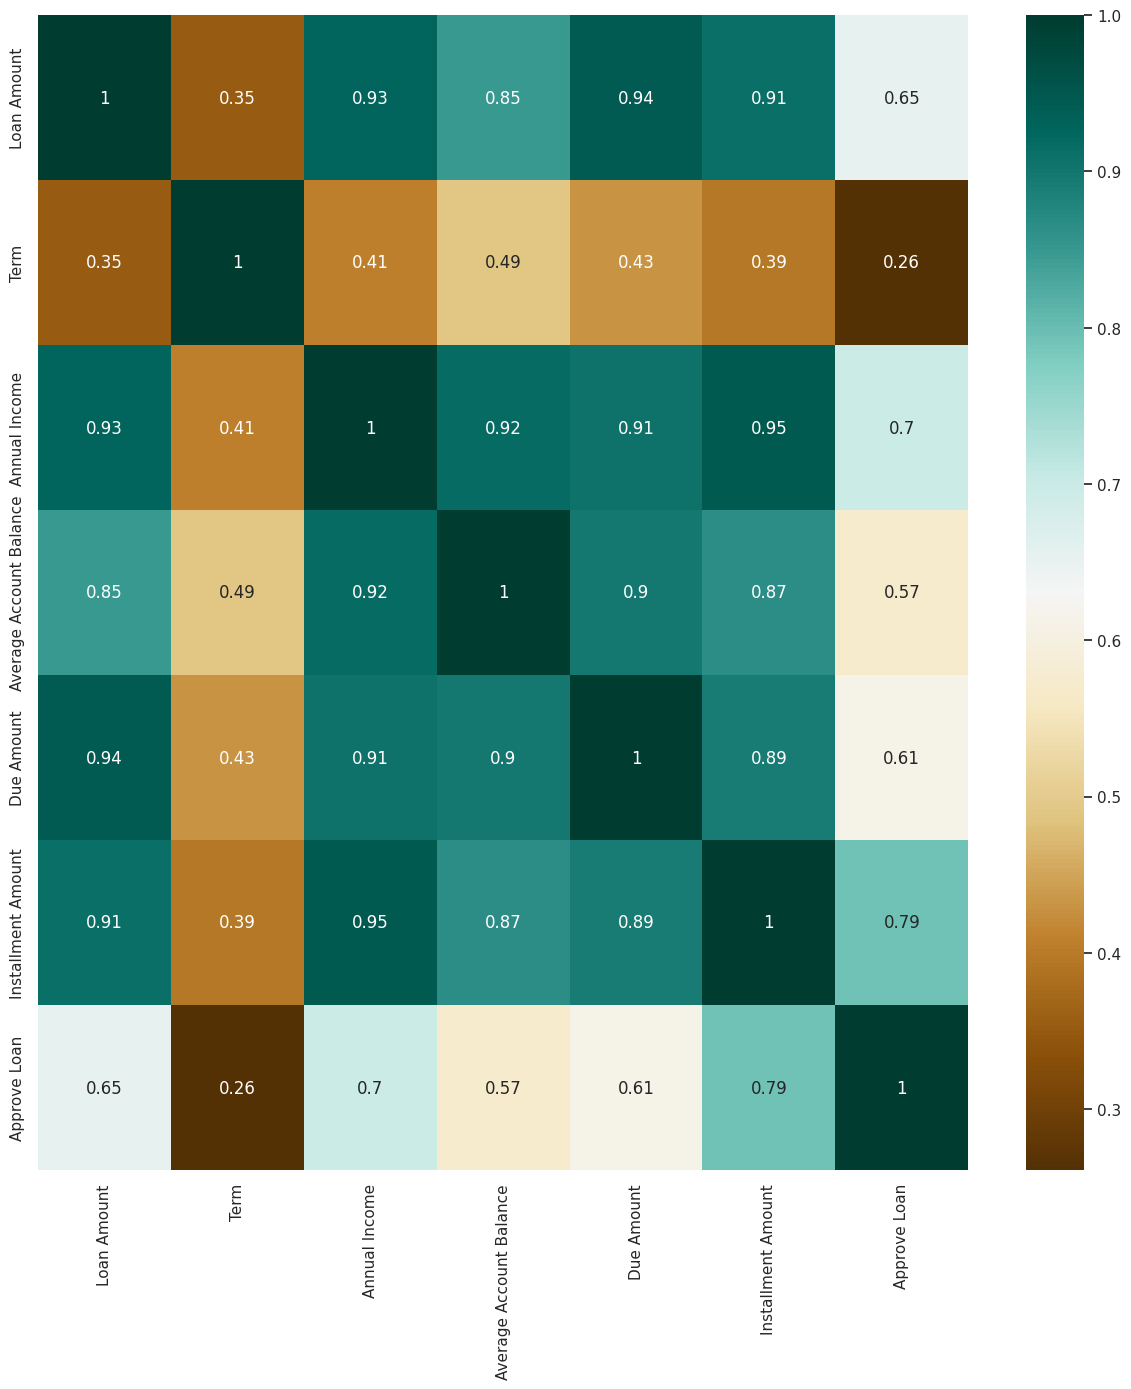

In [ ]:
plt.figure(figsize=(15,15))
c= df.corr()

sns.heatmap(c,cmap="BrBG",annot=True)
c

In [ ]:
df.describe()

,Loan Amount,Term,Annual Income,Average Account Balance,Due Amount,Installment Amount,Approve Loan
count,100.000000,100.000000,100.00000,100.00000,100.000000,100.000000,100.000000
mean,11470.000000,32.520000,80150.00000,15680.00000,74.600000,319.500000,0.600000
std,4528.149889,15.472674,18415.17545,6574.94479,65.155912,119.530859,0.492366
min,5000.000000,12.000000,50000.00000,8000.00000,0.000000,150.000000,0.000000
25%,8000.000000,24.000000,65000.00000,11000.00000,30.000000,200.000000,0.000000
50%,10000.000000,36.000000,75000.00000,13000.00000,50.000000,300.000000,1.000000
75%,15000.000000,48.000000,95000.00000,18000.00000,100.000000,400.000000,1.000000
max,22000.000000,60.000000,120000.00000,35000.00000,250.000000,550.000000,1.000000


<AxesSubplot:xlabel='Annual Income', ylabel='Loan Amount'>

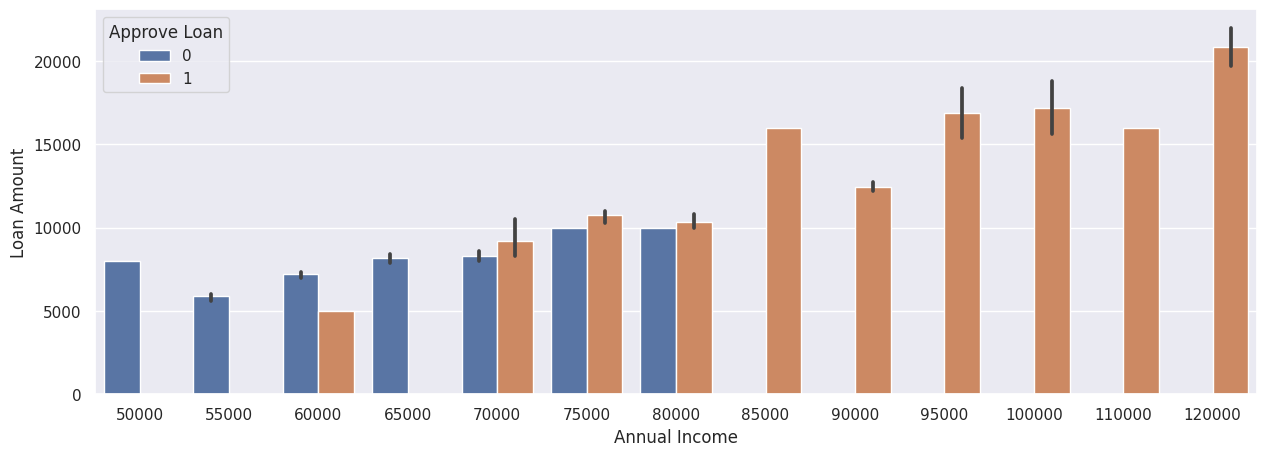

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(data=df, x='Annual Income', y='Loan Amount', hue='Approve Loan')

<AxesSubplot:xlabel='Annual Income', ylabel='Loan Amount'>

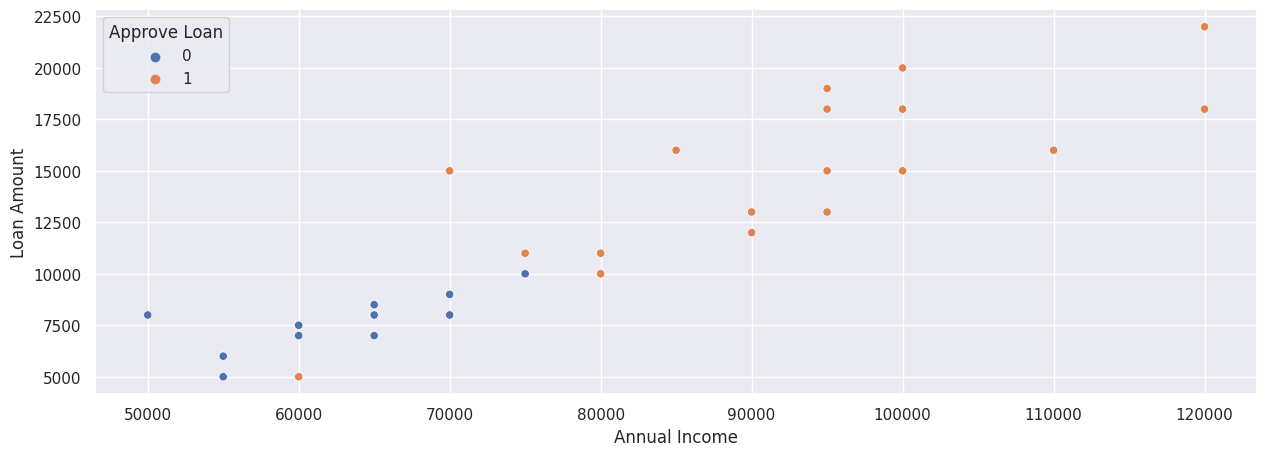

In [ ]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=df, x='Annual Income', y='Loan Amount', hue='Approve Loan')

<AxesSubplot:xlabel='Annual Income', ylabel='Average Account Balance'>

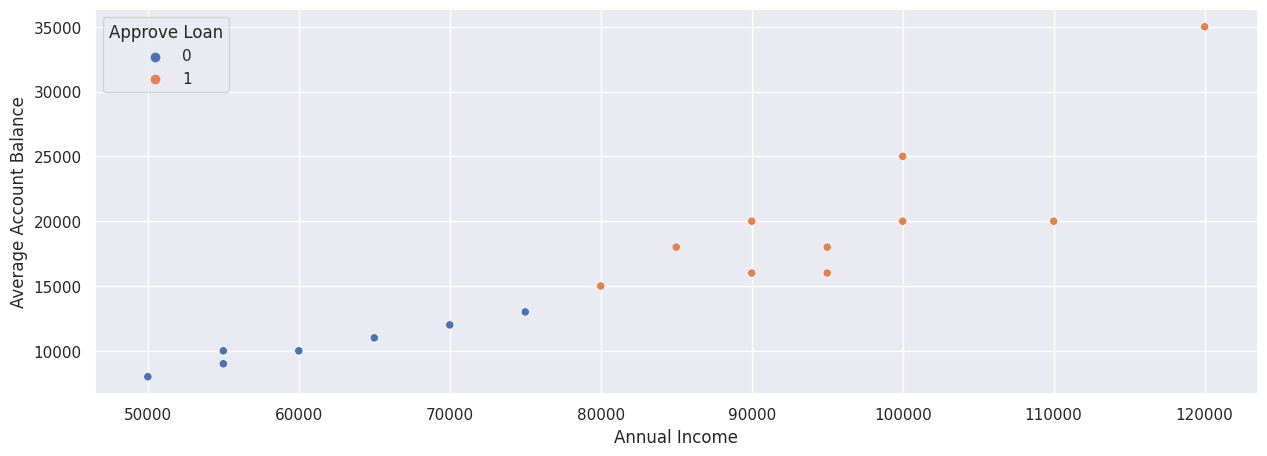

In [ ]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=df, x='Annual Income', y='Average Account Balance', hue='Approve Loan')

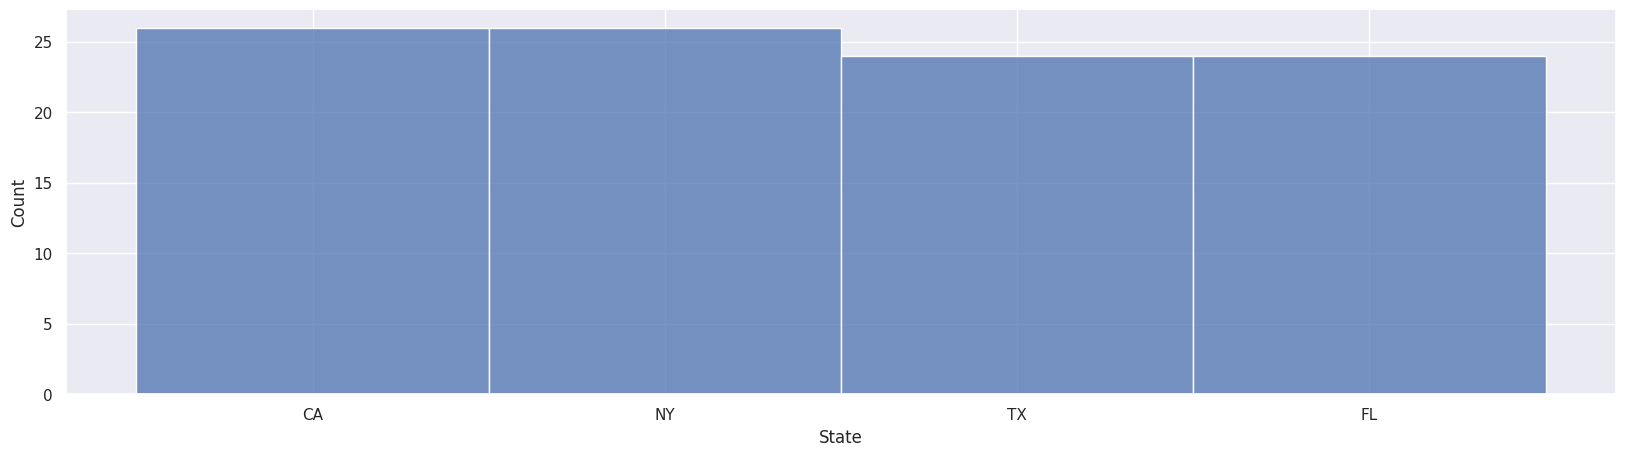

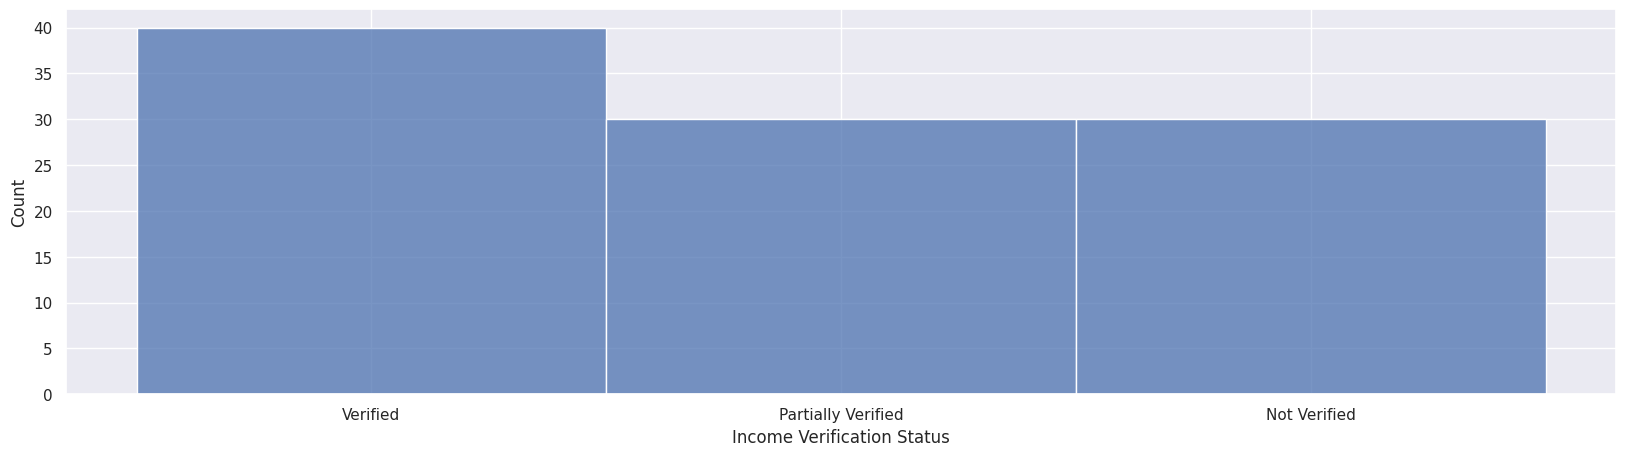

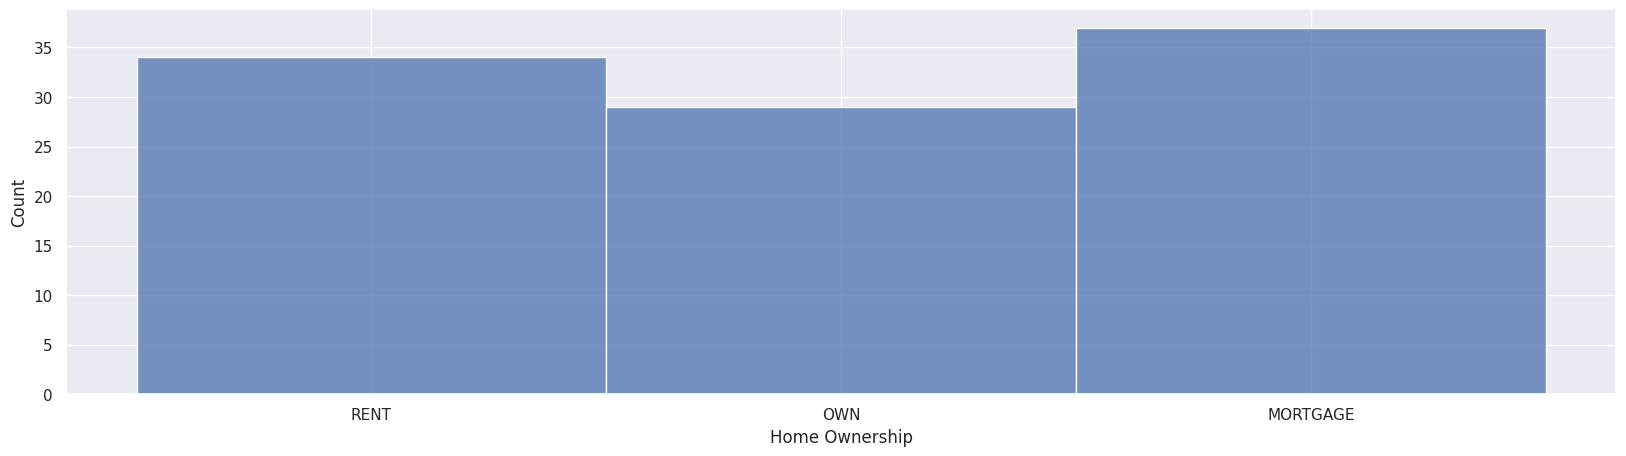

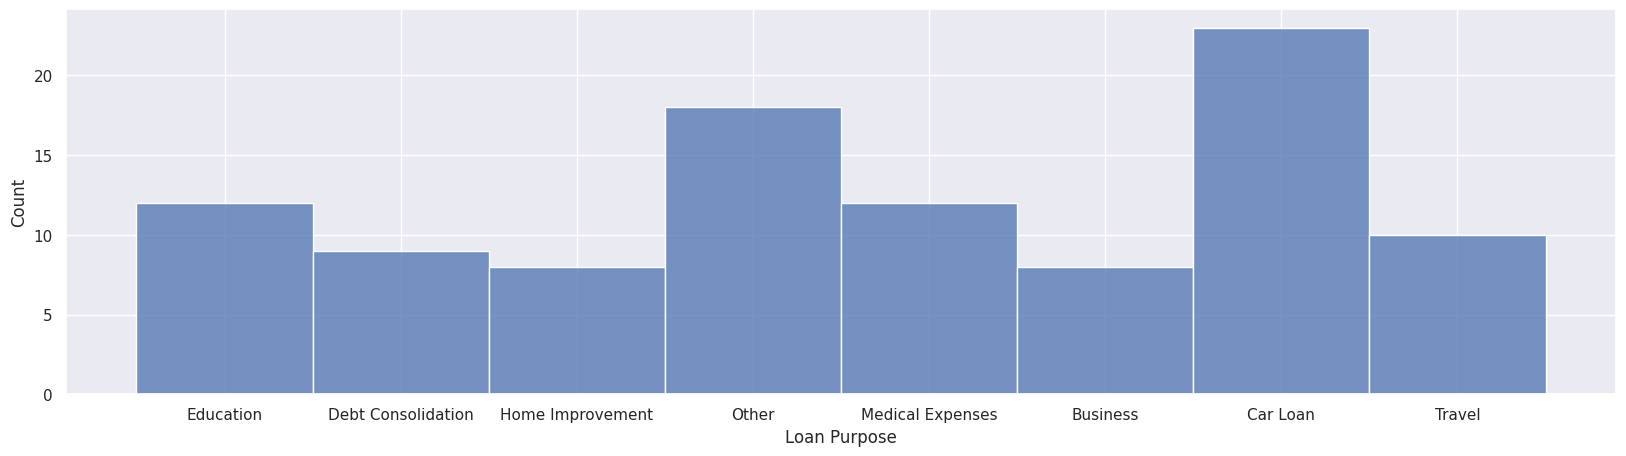

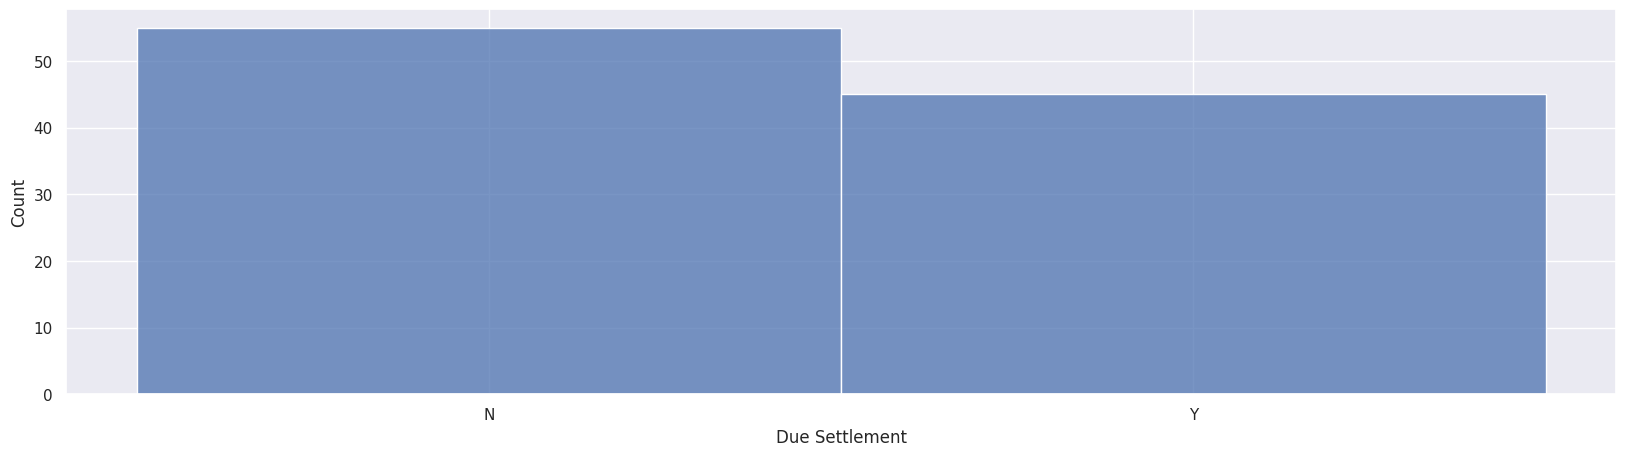

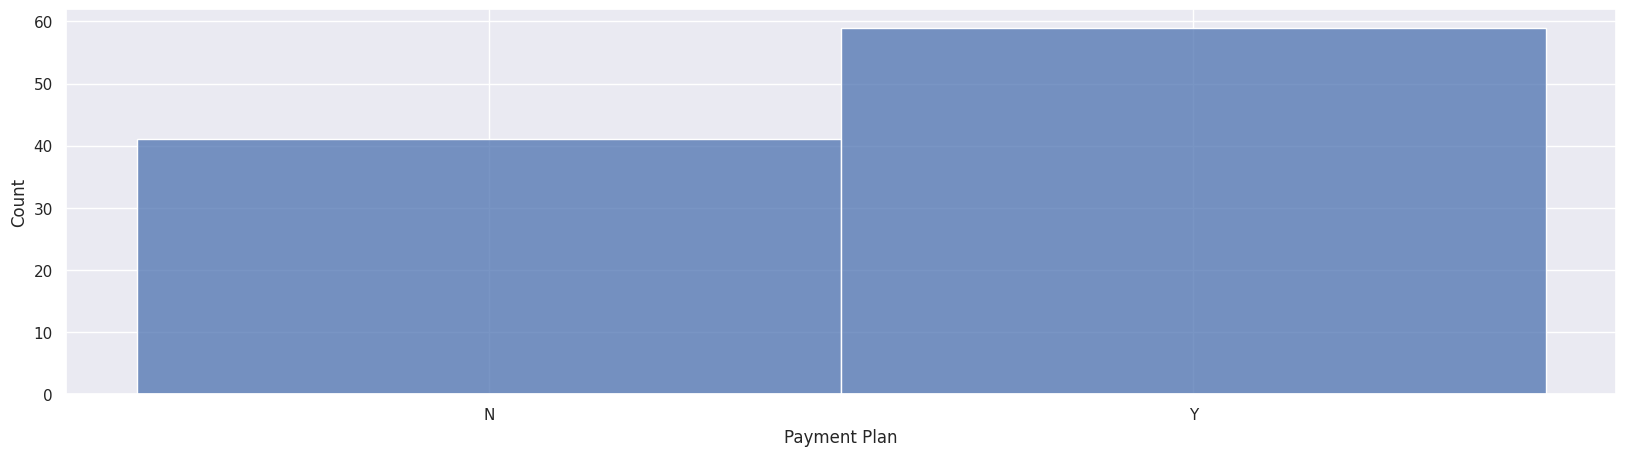

In [ ]:
categorical_vars = df.dtypes[df.dtypes == 'object'].index.to_list()

for var in categorical_vars:
    plt.figure(figsize=(20,5))
    plot = sns.histplot(data=df, x=var)
    plt.show()


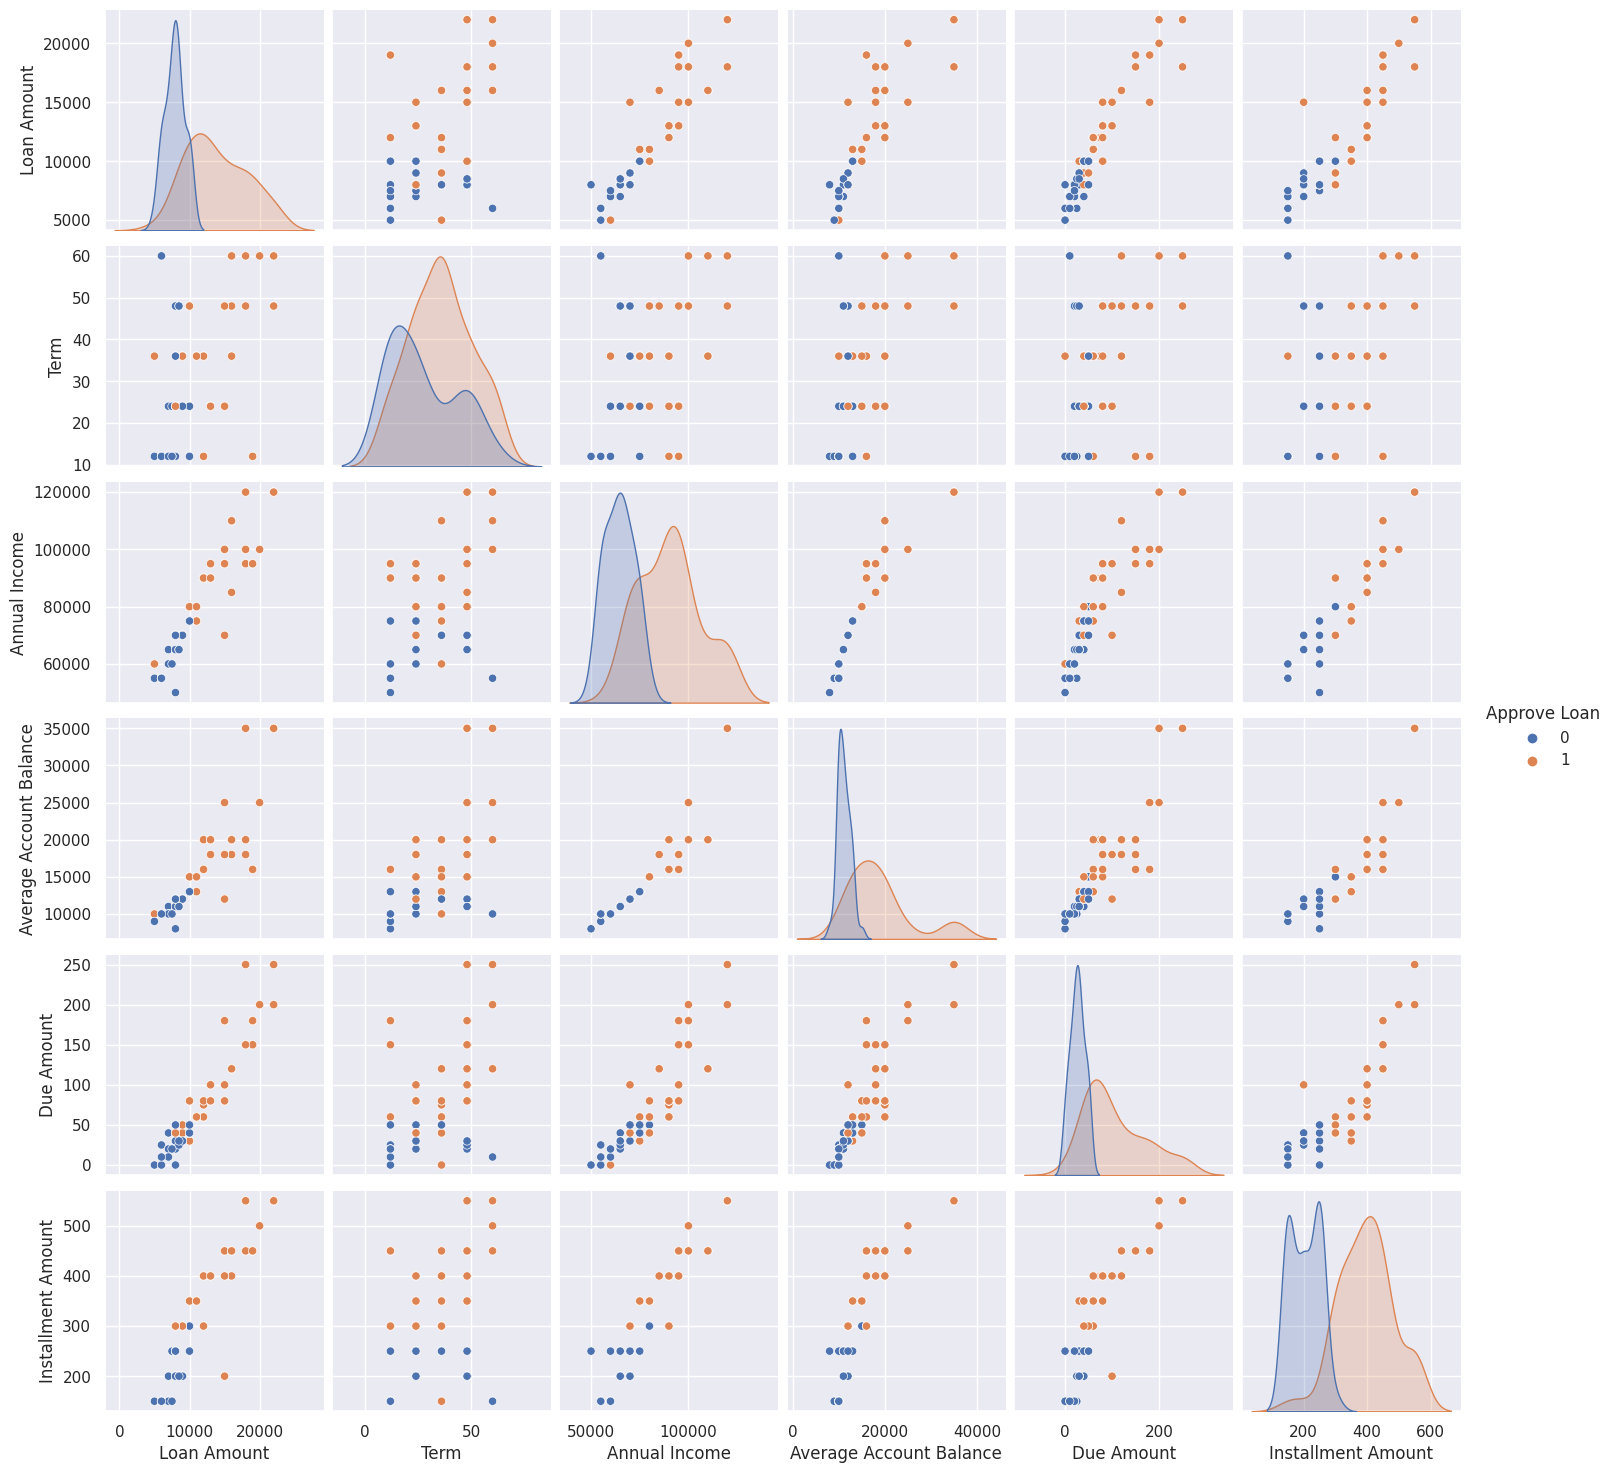

In [ ]:
# loan = df.drop(['id'], axis=1)
sns.pairplot(df, hue='Approve Loan')

#### Given the scope of this project, all the variables will be kept for training the model